In [2]:
#ROOT = Path(__file__).resolve().parents[0]

In [3]:
import os
import tarfile
import requests
import kaggle
import pandas as pd
import json
from pathlib import Path
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlas
import matplotlib
from IPython.display import display
from random import choices
plt.style.use("ggplot")
from matplotlib.pyplot import figure


In [4]:
ROOT = os.getcwd()


In [5]:
def fetch_data(download_url, download_path):
    kaggle.api.authenticate()
    kaggle.api.dataset_download_files(download_url, path=download_path, unzip=True)
    return kaggle.api.dataset_list_files(download_url).files

In [6]:
def import_load_data(csv_path, encoding="ISO-8859-1"):
    
    encoding = input("Default enconding is ISO-8859-1, do you prefer another one? Please type it.")
    
    try:
        df = pd.read_csv(csv_path, encoding=encoding)
    except:
        df = pd.read_csv(csv_path, encoding="ISO-8859-1")
    return df

In [7]:
def download_import_kaggle():
    
    download_root = input("Please enter the url where your desired csv is: ")
    download_path = os.path.join("dataset")
    
    download_url = download_root.split("/", 3)[3]
    csv_files = fetch_data(download_url, download_path)

    if len(csv_files) == 1:
        csv_path = ROOT + "/dataset/" + str(csv_files[0])
    else:
        csv_file = input(f"Please what file did you need to import from this list {csv_files}?: ")
        csv_path = ROOT + "/dataset/" + csv_file
    return import_load_data(csv_path, encoding="ISO-8859-1")


In [13]:
df = download_import_kaggle()

Please enter the url where your desired csv is: https://www.kaggle.com/teajay/global-shark-attacks
Default enconding is ISO-8859-1, do you prefer another one? Please type it.


In [57]:
def first_transformation(df):
    df = df.applymap(lambda s:s.lower() if type(s) == str else s)
    df.columns = df.columns.str.lower()
    df.columns = df.columns.str.strip()
    instant_df = pd.DataFrame()
    inf_df = pd.DataFrame(index=range(1))
    cols = df.columns
    for col in cols:
        pct_missing = np.mean(df[col].isnull())
        inf_df[col] = f"{round(pct_missing*100)}%"
        missing = df[col].isnull()
        num_missing = np.sum(missing)

        if num_missing > 0:
            instant_df[f"{col}_is_missing"] = missing
        else:
            instant_df[f"{col}_is_missing"] = 0
    display(inf_df.T)
    is_missing_cols = [col for col in instant_df.columns if "is_missing" in col]
    instant_df["num_missing"] = instant_df[is_missing_cols].sum(axis = 1)
    if len(cols) < 30:
        colors = ["#000099", "#ffff00"]
        sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colors))
    else:
        instant_df["num_missing"].value_counts().reset_index().sort_values(by="index").plot.bar(x = "index", y = "num_missing")
    return df


,0
case number,66%
date,76%
year,76%
type,76%
country,76%
area,77%
location,78%
activity,78%
name,76%
sex,78%


,case number,date,year,type,country,area,location,activity,name,sex,...,species,investigator or source,pdf,href formula,href,case number.1,case number.2,original order,unnamed: 22,unnamed: 23
0,2018.06.25,25-jun-2018,2018.0,boating,usa,california,"oceanside, san diego county",paddling,julie wolfe,f,...,white shark,"r. collier, gsaf",2018.06.25-wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-jun-2018,2018.0,unprovoked,usa,georgia,"st. simon island, glynn county",standing,adyson mcneely,f,...,NaN,"k.mcmurray, trackingsharks.com",2018.06.18-mcneely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-jun-2018,2018.0,invalid,usa,hawaii,"habush, oahu",surfing,john denges,m,...,NaN,"k.mcmurray, trackingsharks.com",2018.06.09-denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-jun-2018,2018.0,unprovoked,australia,new south wales,arrawarra headland,surfing,male,m,...,2 m shark,"b. myatt, gsaf",2018.06.08-arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-jun-2018,2018.0,provoked,mexico,colima,la ticla,free diving,gustavo ramos,m,...,"tiger shark, 3m",a .kipper,2018.06.04-ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


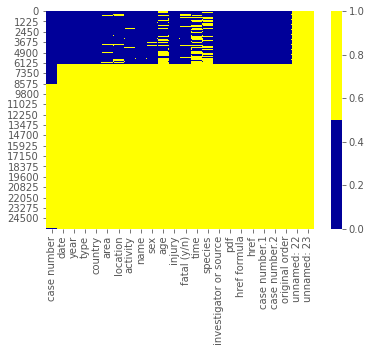

In [58]:
first_transformation(df)

case number - 66%
case number
0.6617035338024336
date - 76%
date
0.7550052482214361
year - 76%
year
0.7550829996501186
type - 76%
type
0.7551607510788011
country - 76%
country
0.7569490339384987
area - 77%
area
0.7726936982467053
location - 78%
location
0.7759981339657116
activity - 78%
activity
0.7761536368230766
name - 76%
name
0.7631691482330988
sex - 78%
sex
0.7769700268242429
age - 87%
age
0.8650623955215178
injury - 76%
injury
0.7560937682229911
fatal (y/n) - 78%
fatal (y/n)
0.7759592582513704
time - 89%
time
0.885394394121992
species - 87%
species
0.8653345255219065
investigator or source - 76%
investigator or source
0.7556661353652373
pdf - 76%
pdf
0.7550052482214361
href formula - 76%
href formula
0.7550441239357774
href - 76%
href
0.7550052482214361
case number.1 - 76%
case number.1
0.7550052482214361
case number.2 - 76%
case number.2
0.7550052482214361
original order - 75%
original order
0.7547331182210473
unnamed: 22 - 100%
unnamed: 22
0.9999611242856588
unnamed: 23 - 100%


,case number,date,year,type,country,area,location,activity,name,sex,...,species,investigator or source,pdf,href formula,href,case number.1,case number.2,original order,unnamed: 22,unnamed: 23
0,2018.06.25,25-jun-2018,2018.0,boating,usa,california,"oceanside, san diego county",paddling,julie wolfe,f,...,white shark,"r. collier, gsaf",2018.06.25-wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-jun-2018,2018.0,unprovoked,usa,georgia,"st. simon island, glynn county",standing,adyson mcneely,f,...,NaN,"k.mcmurray, trackingsharks.com",2018.06.18-mcneely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-jun-2018,2018.0,invalid,usa,hawaii,"habush, oahu",surfing,john denges,m,...,NaN,"k.mcmurray, trackingsharks.com",2018.06.09-denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-jun-2018,2018.0,unprovoked,australia,new south wales,arrawarra headland,surfing,male,m,...,2 m shark,"b. myatt, gsaf",2018.06.08-arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-jun-2018,2018.0,provoked,mexico,colima,la ticla,free diving,gustavo ramos,m,...,"tiger shark, 3m",a .kipper,2018.06.04-ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


Index(['case number', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex', 'age', 'injury', 'fatal (y/n)', 'time',
       'species', 'investigator or source', 'pdf', 'href formula', 'href',
       'case number.1', 'case number.2', 'original order', 'unnamed: 22',
       'unnamed: 23'],
      dtype='object')


KeyboardInterrupt: Interrupted by user

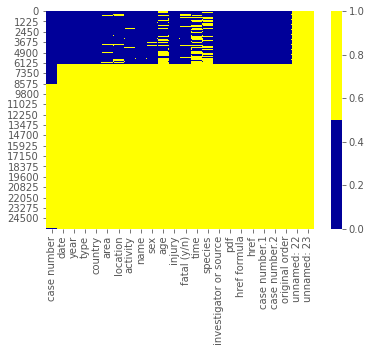

In [32]:
def first_view(df):
    df = first_transformation(df)
    display(df.head())
    all_or_part_df(df)
    print("---------------------------------------------------------------------------")
    print(df.info())
    print("---------------------------------------------------------------------------")
    display(df.describe().T)
    print("---------------------------------------------------------------------------")
    df.hist(bins=50, figsize =(20,15))
    plt.show()
first_view(df)

In [ ]:
def first_view(df):
    print(df.info())
    print("---------------------------------------------------------------------------")
    display(df.describe().T)
    print("---------------------------------------------------------------------------")
    display(df.head())
    print("---------------------------------------------------------------------------")
    df.hist(bins=50, figsize =(20,15))
    plt.show()


# In[5]:


def all_or_part_df(df):
    print(df.columns)
    while True:
        answer_all = input("Do you want transform all df or only somo columns? If so type df or the list of columns you want to transform without [].")
        if answer_all == "df":
            return df
        else:
# ARREGLAR LA PARTE DE LA LISTA NO VA BIEN.
            lst = answer_all.split(",")
            if lst in df.columns.tolist().split(","):
                return df[[lst]]
            else:
                print("Wrong columns. Try df or a list of columns")
                continue
            


# In[6]:



# In[7]:


def drop_columns_nans(df, max_nan=0, subset=None, keep="first", toppct = 0.95):
    a = df.shape
    #quitar columnas vacias y duplicadas
    df.dropna(axis=1, how="all", inplace=True)
    df = df.T.drop_duplicates().T
    #quitar filas por condicion Thresh y filas duplicadas
    df = df.dropna(axis=0, thresh=max_nan)
    df.drop_duplicates(subset, keep, inplace=True)
    #columnas estadisticamente irrelevantes
    num_rows = len(df.index)
    low_information_cols = []
    for col in df.columns:
        cnts = df[col].value_counts(dropna=False)
        top_pct = (cnts/num_rows).iloc[0]
        if top_pct > toppct:
            low_information_cols.append(col)
    df.drop(low_information_cols, axis=1, inplace=True)
    b = df.shape
    columns_dropped = a[1] - b[1]
    rows_dropped = a[0] - b[0]
    print(f"{columns_dropped} columns dropped")
    print(f"{rows_dropped} rows dropped")
    print(f"The new shape is {b[0]} rows and {b[1]} columns")
    return df

